### IMPORT MODULES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore')

### Upload Dataset 

In [2]:
train = pd.read_csv(r"C:\Users\manoj\Desktop\train.csv")

In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Data Analyzing

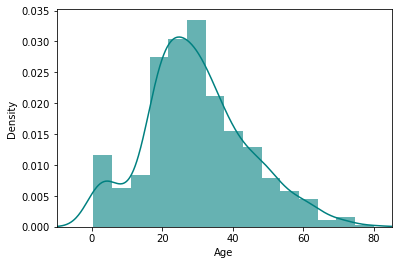

In [4]:
ax = train["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

### No of deaths and survived 

<AxesSubplot:xlabel='Survived', ylabel='count'>

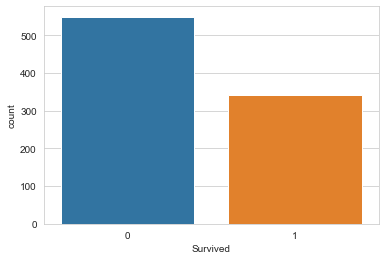

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

### No of Male and female survive and death 

<AxesSubplot:xlabel='Survived', ylabel='count'>

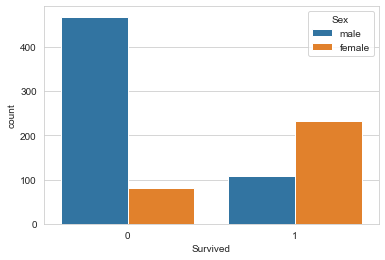

In [6]:
sns.countplot(x='Survived',data=train,hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

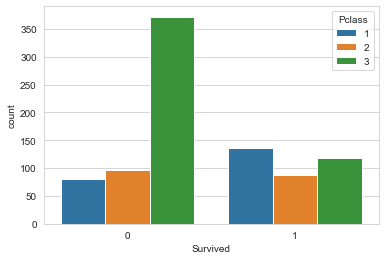

In [7]:
sns.countplot(x='Survived',data=train,hue='Pclass')

<AxesSubplot:xlabel='Age'>

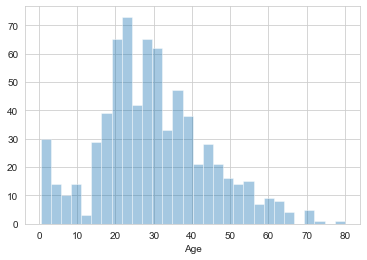

In [8]:
sns.distplot(train['Age'].dropna(),bins=30,kde=False)

<AxesSubplot:>

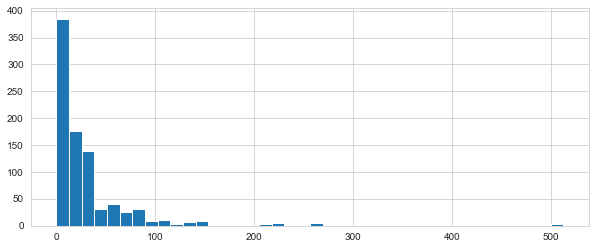

In [9]:
train['Fare'].hist(bins=40,figsize=(10,4))

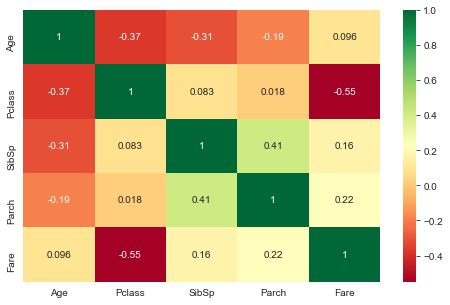

In [10]:
Selected_features = ['Age', 'Pclass','SibSp' ,'Parch','Fare','Embarked', 'Sex']
X = train[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [11]:
train.groupby('Pclass').mean()['Age'].round()

Pclass
1    38.0
2    30.0
3    25.0
Name: Age, dtype: float64

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

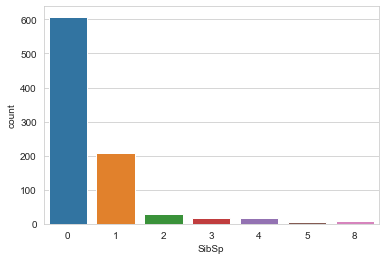

In [13]:
sns.countplot(x="SibSp",data = train)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

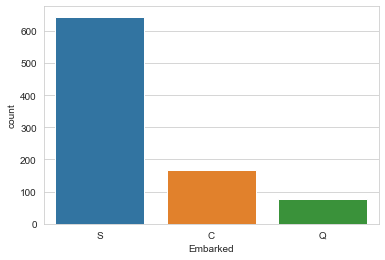

In [14]:
sns.countplot(x="Embarked",data = train)

## Data Wrangling

In [15]:
train.isnull().head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [16]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

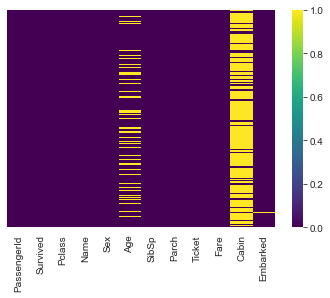

In [17]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

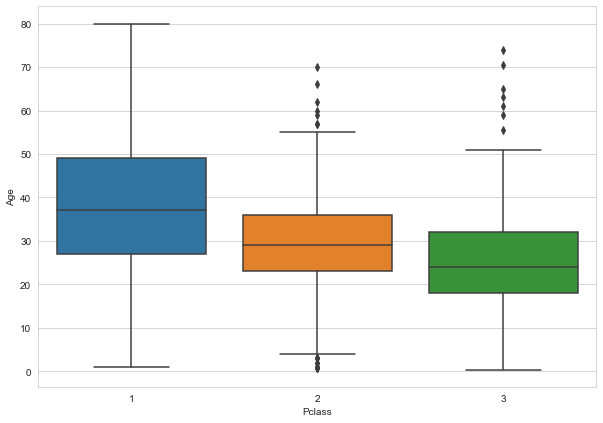

In [18]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [19]:
train.drop('Cabin',axis=1,inplace=True)

In [20]:
train.dropna(inplace= True)

<AxesSubplot:>

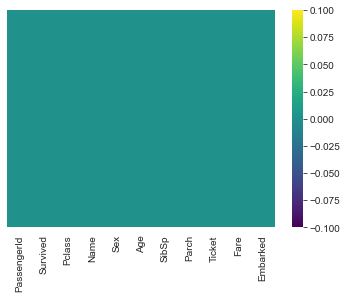

In [21]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')

In [22]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [23]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [24]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [25]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [26]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [27]:
pcl = pd.get_dummies(train['Pclass'],drop_first=True)

In [28]:
pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [29]:
train = pd.concat([train,sex,embark,pcl],axis=1)

In [30]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [31]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [32]:
train.drop(['Pclass'],axis=1,inplace=True)

In [33]:
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1,0,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,1,0,1


## Train Data

In [34]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix

In [37]:
logmodel = LogisticRegression()

In [38]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [39]:
logmodel.score(X_train,y_train)*100

79.08611599297012

In [40]:
logmodel.score(X_test,y_test)*100

76.92307692307693

In [41]:
y_pred = logmodel.predict(X_test)

## Prediction

In [42]:
train_x = train.drop('PassengerId',axis=1)

In [43]:
predictions = logmodel.predict(train_x)

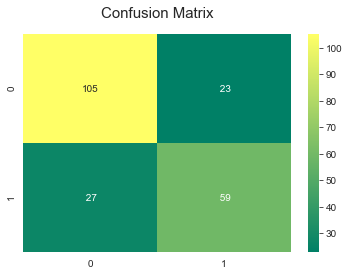

In [44]:
sns.heatmap(confusion_matrix(y_test , y_pred),annot=True,fmt='3.0f',cmap='summer')
plt.title('Confusion Matrix',y=1.05,size=15)
plt.show()

In [45]:
final_prediction = pd.DataFrame({'PassengerId':train['PassengerId'],'Survived':predictions})

In [46]:
final_prediction.head(10)

,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
6,7,0
7,8,0
8,9,0
9,10,1
10,11,1
